## Praca domowa 5

W poniżej rozwiązanym zadaniu będę testować dwie metody klasteryzujące. Następnie wybiorę optymalną liczbę klastrów.

Zaimportuję wszystkie potrzebne biblioteki najpierw, a następnie wczytam zbiór danych (nie posiada on nazw kolumn) i wyświetlę kilka pierwszych rzędów. 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [4]:
data_df = pd.read_csv('clustering.csv', header=None)
data_df.columns=["x","y"]
data_df.head()


x          y
0  41.788907  52.220182
1 -96.586516  90.957033
2 -54.143591 -99.153377
3  19.929231 -45.859779
4 -82.941076  84.099186

Zobaczmy jak wygląda rozłożenie naszych danych na układzie współrzędnych.

<AxesSubplot:xlabel='x', ylabel='y'>

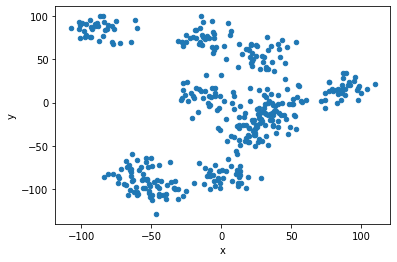

In [15]:
data_df.plot.scatter('x', 'y')

Jak możemy zobaczyć, dane nie są skupione w jednym punkcie, raczej są w kilku, co będzie pomocne przy rozwiązywaniu zadania metodamy klasteryzacji.

### Pierwsza z metod klasteryzacji
Będzie nią metoda k-średnich.

In [5]:
def plot_kmeans_clusters(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
    plt.title('K-means clusters')
    plt.show()

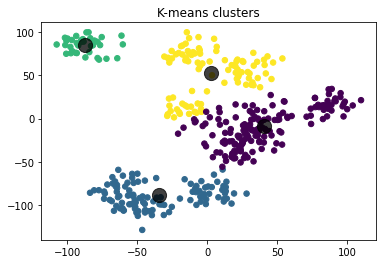

In [6]:
np_data = data_df.to_numpy()
plot_kmeans_clusters(np_data, n_clusters=4)

Powyżej mamy graficzne przedstawienie przypisania naszych danych do 4 klastrów. Liczba ta została wybrana losowo, jednak nie jest najoptymalniejszym rozwiązaniem losowanie liczby klastrów. Lepszą metodą jest np. poznana na zajęciach metoda łokcia.

#### Metoda łokcia

In [7]:
def count_wcss_scores(X, k_max):
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1
        scores.append(wcss)
    return scores

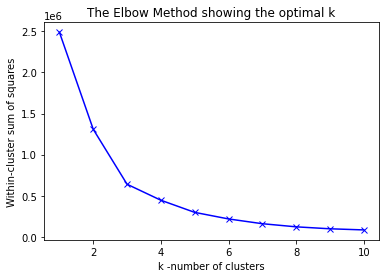

In [8]:
wcss_vec = count_wcss_scores(np_data, 10)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k -number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Według tej metody powinniśmy wybrać takie k znajdujące się na wykresie, od którego nasz wykres zaczyna bardzo powoli maleć. W naszym wypadku nie ma tutaj bardzo jednoznacznego wyboru, stąd będzie on subiektywny. Spróbuję dla k=6 oraz k=8.

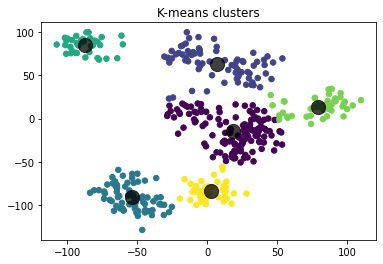

In [9]:
plot_kmeans_clusters(np_data, n_clusters=6)

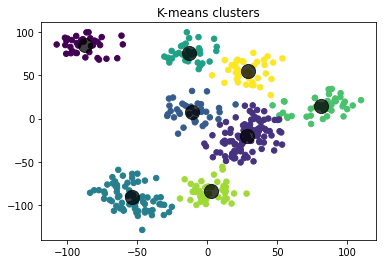

In [10]:
plot_kmeans_clusters(np_data, n_clusters=8)

Z powyższych wykresów wygląda, jakby podział na 8 klastrów powodował lepsze podzielenie punktów (dla 6 punkty o kolorach fioletowych mają mało wyraźną granicę), jednak podział na 6 nie jest również zły.

### Druga metoda
Jest nią Agglomerative Clustering.

Zobaczmy jak się sprawdzi dla 4, 6 i 8 klastrów, zdefiniowanych odgórnie, na podstawie wyników poprzedniej metryki. Spróbuję również zobaczyć która opcja dla 'linkage' wypada najbardziej korzystnie - to ją będę rozważać później.

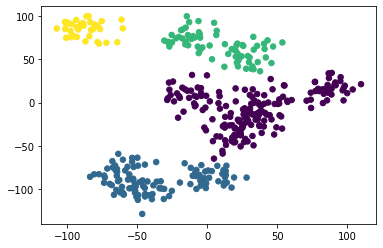

In [11]:
model = AgglomerativeClustering(n_clusters=4, linkage = 'ward')
y = model.fit_predict(np_data)
plt.scatter(np_data[:, 0], np_data[:, 1], c=y, s=30, cmap='viridis')
plt.show()

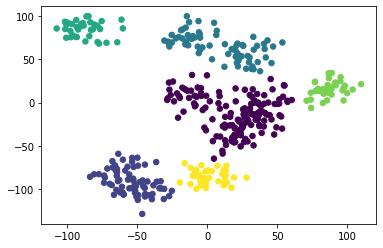

In [12]:
model = AgglomerativeClustering(n_clusters=6, linkage = 'ward')
y = model.fit_predict(np_data)
plt.scatter(np_data[:, 0], np_data[:, 1], c=y, s=30, cmap='viridis')
plt.show()

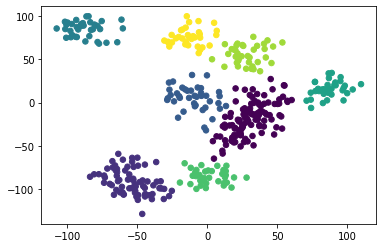

In [13]:
model = AgglomerativeClustering(n_clusters=8, linkage = 'ward')
y = model.fit_predict(np_data)
plt.scatter(np_data[:, 0], np_data[:, 1], c=y, s=30, cmap='viridis')
plt.show()

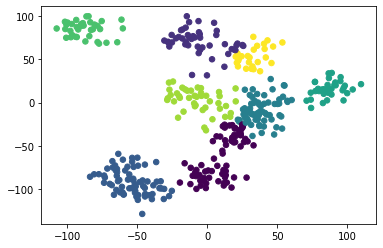

In [14]:
model = AgglomerativeClustering(n_clusters=8, linkage = 'complete')
y = model.fit_predict(np_data)
plt.scatter(np_data[:, 0], np_data[:, 1], c=y, s=30, cmap='viridis')
plt.show()

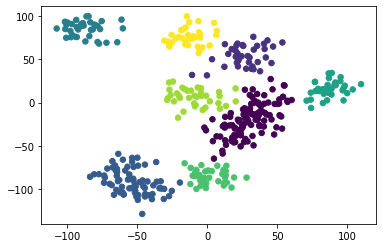

In [15]:
model = AgglomerativeClustering(n_clusters=8, linkage = 'average')
y = model.fit_predict(np_data)
plt.scatter(np_data[:, 0], np_data[:, 1], c=y, s=30, cmap='viridis')
plt.show()

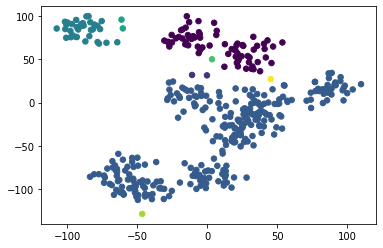

In [16]:
model = AgglomerativeClustering(n_clusters=8, linkage = 'single')
y = model.fit_predict(np_data)
plt.scatter(np_data[:, 0], np_data[:, 1], c=y, s=30, cmap='viridis')
plt.show()

Wizualnie wydaje się, że 'ward' wypada najlepiej. Poza tym podziały dla różnej liczby klastrów wyglądają w nim dość dobrze, wyglądają na sensowne. Spróbujmy w takim razie innego wyznaczenia ilości klastrów. A dokładniej - znajdę taki distance_treshold, dla którego podział na klastry będzie wydawał się najoptymalniejszy i policzę liczbę klastrów.

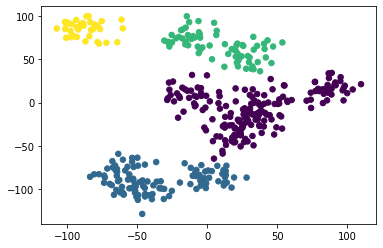

Distance_treshold: 600


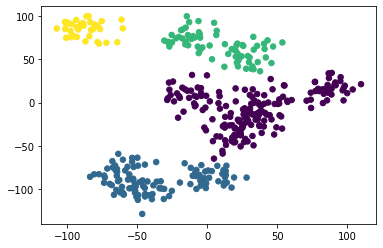

Distance_treshold: 580


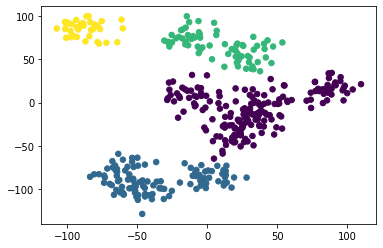

Distance_treshold: 560


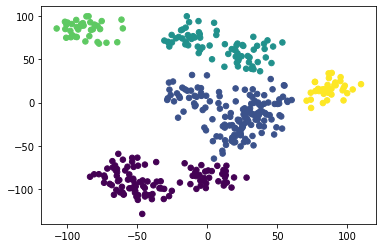

Distance_treshold: 540


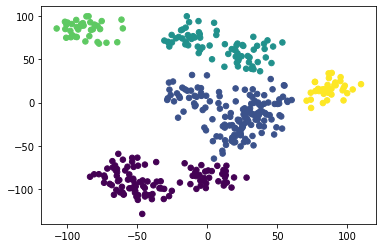

Distance_treshold: 520


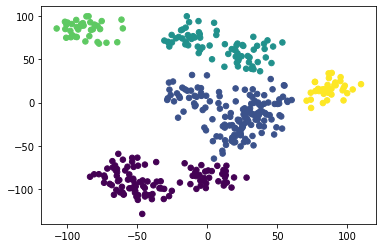

Distance_treshold: 500


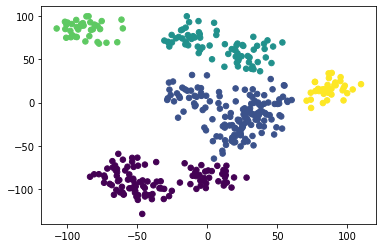

Distance_treshold: 480


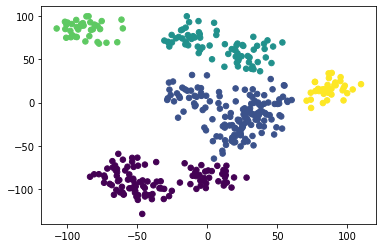

Distance_treshold: 460


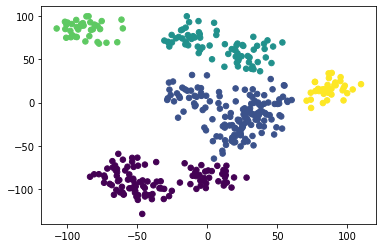

Distance_treshold: 440


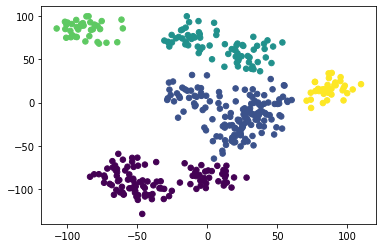

Distance_treshold: 420


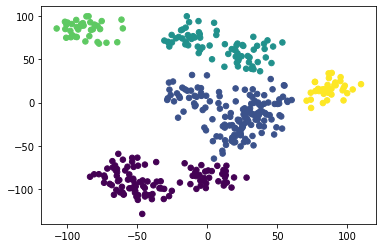

Distance_treshold: 400


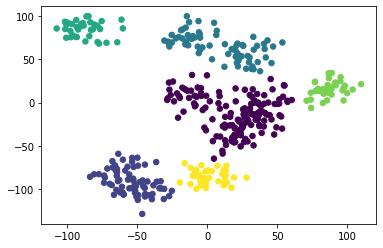

Distance_treshold: 380


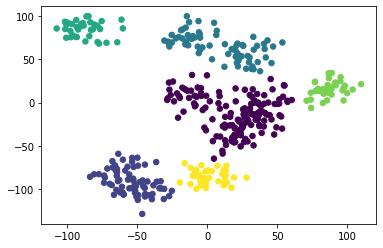

Distance_treshold: 360


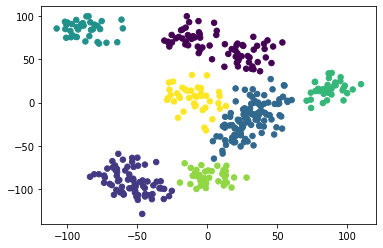

Distance_treshold: 340


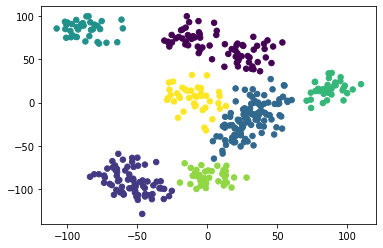

Distance_treshold: 320


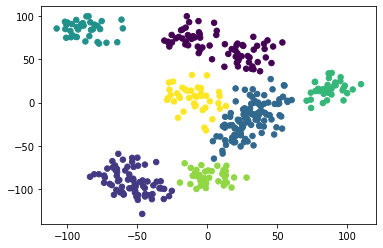

Distance_treshold: 300


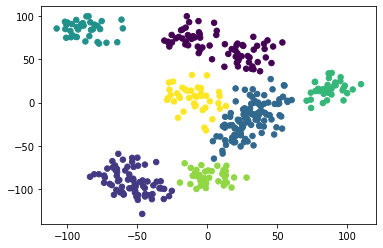

Distance_treshold: 280


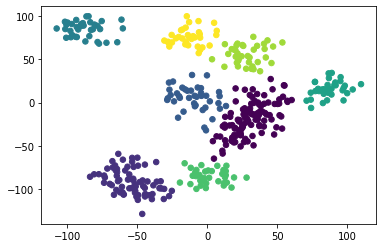

Distance_treshold: 260


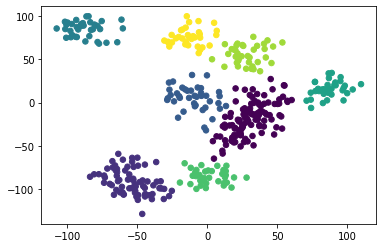

Distance_treshold: 240


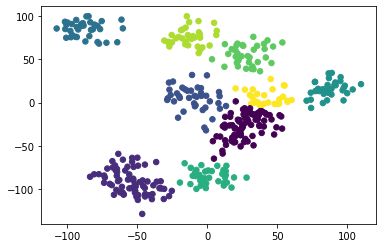

Distance_treshold: 220


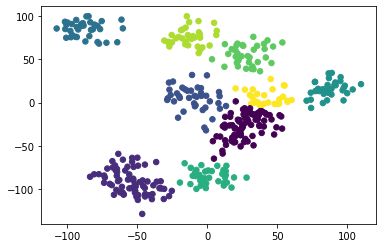

Distance_treshold: 200


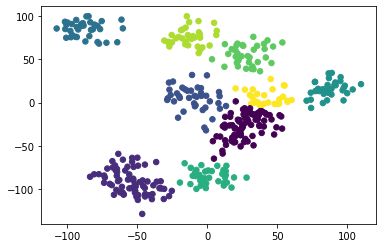

Distance_treshold: 180


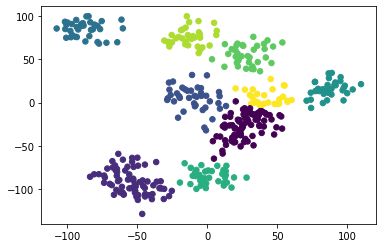

Distance_treshold: 160


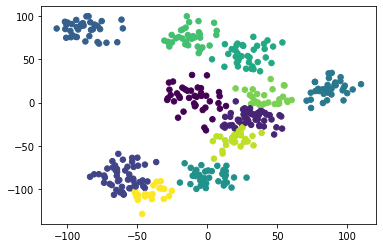

Distance_treshold: 140


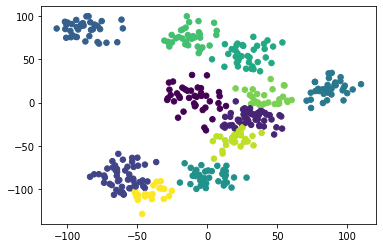

Distance_treshold: 120


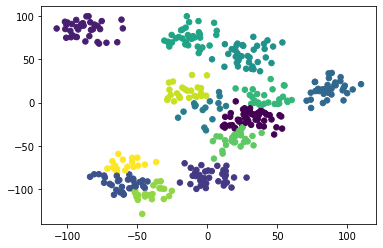

Distance_treshold: 100


In [31]:
for i in range (600, 80, -20):
    model = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold=i)
    y = model.fit_predict(np_data)
    plt.scatter(np_data[:, 0], np_data[:, 1], c=y, s=30, cmap='viridis')
    plt.show()
    print(f'Distance_treshold: {i}')

Obserwacje z powyższych wyników: dla distance_treshold poniżej 160 robi się bardzo dużo klastrów, które wydają się niepotrzebne, mamy do czynienia ze zbyt drobiazgowym podziałem. Podział na 8 klastrów wydaje się dość optymalny, mamy wystarczająco odseparowane części danych. Innym podziałem, który wizualnie wydaje się dobrym jest 5 klastrów. Jednak tak naprawdę wizualnie dobrze wyglądają wszystkie podziały mające od 4 do 9 klastrów. By rozstrzygnąć bardziej matematyczną metodą, która liczba klastrów jest lepsza, spójrzmy na metodę silhouette.

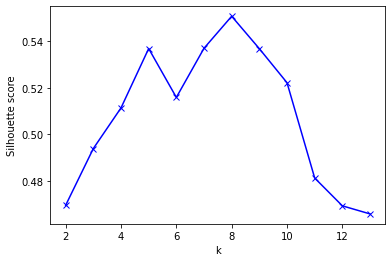

In [24]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores


cluster_num_seq = range(2, 14)
silhouette_vec = count_clustering_scores(np_data, cluster_num_seq, AgglomerativeClustering, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Jej wyniki potwierdzają nasze przypuszczenia na podstawie powyższych wykresów dla różnych odległości. W przypadku tej metody najlepiej sprawdza się 5 lub 8 klastrów. Jednak można również zaobserwować, że dla k pomiędzy 4 a 9/10 te różnice nie są aż tak znaczne, stąd problem rozstrzygnięcia wizualnego, ile klastrów być powinno.

### Podsumowanie
Powyżej zastosowano kilka metod klastrowania a także kilka metod porównania jaka liczba klastrów będzie tą odpowiednią. Na postawie wyniów wszystkich eksperymentów wydaje się, że liczba klastrów równa 8 będzie najbardziej optymalną - wystąpiła ona we wszystkich metodach jako jedna z najlepszych.